In [157]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import duckdb
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.api import OLS
from scipy.stats import bootstrap
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


#### Team members: Jasmine Ren jr2293, Carina Lau cl2623, Savitta Sivapalan ss2849

# Phase 5 Outline
### [Introduction](#Intro)
    - Research Question
    - Key Terminologies
    - Background on the Research Question
### [Data description and cleaning](#Description)
    - Cleaning
    - Data Description
        - Income Dataset
        - Poverty Dataset
        - Population Dataset
        - Unemployment Dataset
        - Crime Dataset
### [Preregistration statement](#Prereg)
    - Hypothesis 1
    - Hypothesis 2
    - Hypothesis 3

### [Data Analysis](#Analysis)
    - Hypothesis 1
    - Hypothesis 2
    - Hypothesis 3
### [Evaluation of Significance](#Evaluation)
    - Hypothesis 1
    - Hypothesis 2
    - Hypothesis 3
### [Conclusion ](#Conclusion)
### [Limitations](#Limitation)
### [Citations](#Citation)

# Introduction <a name = "Intro"></a>

### Key Terminologies
- Violent crime according to the FBI.gov website is defined by the composition of 4 types of crimes: 
    - Aggravated assault: an unlawful attack by one person upon another for the purpose of inflicting severe or aggravated bodily injury
    - Rape: penetration, no matter how slight, of the vagina or anus with any body part or object, or oral penetration by a sex organ of another person, without the consent of the victim
    - Homicide: the willful (nonnegligent) killing of one human being by another
    - Robbery: the taking or attempting to take anything of value from the care, custody, or control of a person or persons by force or threat of force or violence and/or by putting the victim in fear

- Unemployment rate: the percentage of people in the labor force who are unemployed
*The unemployment rate was determined by the average across all the unemployment dataset's years (1980-2018) instead of the current day unemployment rate of 4.2% to account for the change in years and economic conditions

- Income: the total earnings of an individual from various sources such as wages, investment ventures, and other sources of income

- Poverty: the state of not having enough money or resources to meet basic needs, such as food, clothing, and shelter

- Population: the number of people or inhabitants in a country or region

### Research Question: 

What set of factors (income, poverty, population, unemployment) is most influential in determining adult violent crime rates across U.S. states (and the District of Columbia) from 1979-2018? How could we use these factors to accurately predict future violent crime rates?

### Background on the Research Question
Violent crime is a recurring and deeply ingrained issue in the United States. It dominates news channels and political debates. This election year, crime was [Ranked #10 as an “Extremely Important”](https://news.gallup.com/poll/651719/economy-important-issue-2024-presidential-vote.aspx) topic to registered voters in the U.S. and has continuously been of concern in the country. [63% of Americans](https://news.gallup.com/poll/544442/americans-crime-problem-serious.aspx_) describe the crime problem in U.S. as either extremely or very serious, which was up from the 54% last measured in 2021. Headlines about rising crime rates in urban centers, coupled with polarizing opinions on how to address the root causes of such violence, have made this topic relevant. Conversations around violent crime are frequently grounded in stereotypes where impoverished areas are often labelled as inherently dangerous, unemployment is seen as a precursor to crime and low-income populations are disproportionately stigmatized. While these beliefs may oversimplify the issue, they underscore a broader societal need to truly understand the underlying factors driving violent crime in America and how they can be used to interpret ongoing violent crime trends and patterns. 

With unemployment spiking to [7.5% during the recession of the early 1980](shttps://www.bls.gov/opub/mlr/1981/02/art1full.pdf) and [poverty widening throughout the 1990s](https://www2.census.gov) and into the Great Recession of 2008–2009, concerns about the potential link between economic hardship and violent crime repeatedly surfaced. There has always been speculation that these economic stressors are fueling violence in states. However, despite these claims, the relationship between socioeconomic factors, such as income, poverty, population size, unemployment, and crime remains a topic of debate. Are these stereotypes rooted in statistical truth or do they obscure more nuanced explanations? Are there geographic-crime patterns that hold for when we analyze densely populated urban versus rural states? 

Our interest in this research was sparked by our shared interest in watching crime documentaries and between public perceptions and the complexities revealed in crime data. While the media and public discourse often assume a direct connection between economic hardship and violence, the actual predictive strength of variables like income or unemployment in determining violent crime rates, we believe, may not be as straightforward as believed. 

Through a data-driven lens, using crime data from 1979 to 2018 across all U.S. states (including the District of Columbia), we aim to identify which socioeconomic factors are most influential in driving violent crime and to challenge or validate prevailing assumptions. By focusing on statistical patterns rather than stereotypes, we hope to shed light on the broader dynamics of crime, while providing practical insights that could inform policymaking and public safety strategies. As violent crime continues to shape American society, understanding its root causes has never been more important.

# Cleaning 
link: https://github.com/w0ahnder/INFO2950_project/blob/main/phase4_datacleaning/phase4_cleaning.ipynb

# Data Description <a name="Description"></a>

### Income Dataset
The rows of this dataset are the states and their respective values for the columns of this dataset which are the median income and standard error by year (1984 to 2018). This dataset was created by the U.S. Census for the United States governmnet to gather information about the overall income of different states, perhaps to investigate income disparities among states. Some processes that might have influenced what data was observed and recorded is the feasability of the data. This data comes from people who actually fill out the U.S. Census, which we know from history isn't typically everyone. So, the data might not be completly accurate, which explains why the U.S. Census believed it was necessary to include the "standard error" column. The preprocessing and cleaning that we performed on this dataset mainly revolved around looking specifically from the years 2013 to 2018, while also looking specifically at the median income column, since that is what we're interested in, in determining its effect on the research question (violent crime rate). People were involved and they were aware of the data collection. This is because this is the U.S. Census, which people fill out, knowing that their data will be used, likely assuming that it would be used to learn more about the general population of the United States. The raw source can be found here: https://www2.census.gov/programs-surveys/cps/tables/time-series/historical-income-households/h08.xls 

### Poverty Dataset
The rows of this dataset are the states and their respective values for columns that consist of the total population, number in poverty, margin of error, percent in poverty, and margin of error. This dataset was created by the U.S. Census for the United States government to gather more information and learn more about the overall number in poverty and percent of poverty for different states. This could show some economic disparities among states, perhaps as a way for the government to better understand which states need more funding in preventing poverty and homelessness. Some processes that might have influenced what data was observed and recorded is that not everyone in the United States fills out the U.S. Census, which can make the data not necessarily representative of the population, which is likely why the U.S. Census added in the margin of error columns for the number in poverty and percent in poverty values. The preprocessing and cleaning that we performed was breaking up the data by year, specifically 2013-2018, and concatenating all the data from each year together. People were involved and they were aware of the data collection. This is because this is the U.S. Census, which people fill out, knowing that their data will be used, likely assuming that it would be used to learn more about the general population of the United States. The raw source can be found here: https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-poverty-people.html (table 19)

### Population Dataset
- What are the observations (rows) and the attributes (columns)?
The observations (rows) in this dataset represent the United States, including all fifty states, Washington D.C., and Puerto Rico. The attributes (columns) include Census data, Estimates Base, and annual population estimates from 2010 to 2019. This dataset was created to provide updated and accurate estimates of the population for U.S. states and other regions during the years 2010 to 2019, helping to track population trends and emigration patterns. Such information is crucial for resource allocation, cultural representation, and policymaking. The dataset was funded by the U.S. Census Bureau, a government organization under the U.S. Department of Commerce.

The observed and recorded data may have been influenced by migration trends, survey methodologies, and reporting mechanisms such as birth and death records. Data accuracy could vary based on resource availability and the capacity to collect data in less focused or rural regions. Undocumented residents in such areas might also impact the comprehensiveness of the dataset. Preprocessing of the data likely involved cleaning, validation, and formatting to ensure clarity and usability for analysis. As the dataset was made available in Excel format, it was structured to facilitate straightforward analysis by users.

While the public may not have been directly aware of the specific collection of this population data, it is common practice in this era to use collected data for larger analysis and decision-making purposes. The raw source data can be found at the U.S. Census Bureau website, specifically at this link: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html. Users should refer to the section labeled “Annual Estimates of the Resident Population for the United States…” for the original dataset.

### Unemployment Dataset
The rows of the original dataset include the annual unemployemnt rate for each of the states and the columns specifies which year the rate is for. Our cleaned dataset only includes columns for years 2013-2018

The dataset was created by Iowa State University using data collectd from the Bureau of Labor Statistics (BLS) using Local Area Unemployment Statistics (LAUS) and the Current Population Survey (CPS) and its purpose was to compile all of the unemployment rates over the years into a single table for the states. 

The creation of the dataset does not seem to have been funded.

The survey is conducted as an interview where participants are asked a series of questions relating to employment status, age, occupation, etc. If participants did not feel comfortable answering a certain question, they did not need to anwer it. This could affect the data collection since there would be missing information from some participants and not for others. 


In terms of prepocessing, the BLS removes all conidential information from their survey results (like names and addresses), and then proceed to analayze and publish their statistics.  

The people interviewed for the survey are aware that their responses will be used to create statistical information about the labor market, and that personal information would be confidential. 
link to data https://www.icip.iastate.edu/tables/employment/unemployment-states

### Crime Dataset
The observations (rows) in this dataset represent years from 1979 to 2023, while the attributes (columns) include state abbreviations, state names, population, violent crime, homicide, legacy rape, revised rape, robbery, aggravated assault, property crime, burglary, larceny, and motor vehicle theft. This dataset was created to provide transparent access to crime data across the United States and is part of the broader Uniform Crime Reporting (UCR) Program, which was established in 1930 to standardize and report crime statistics consistently across states, agencies, and local jurisdictions. By creating a uniform way to collect and analyze crime data, the dataset ensures comparability. Additionally, as seen on the front page of the website, the backend data helps track crime trends and showcases the FBI’s progress in reducing crimes and improving their track record over time. It serves as a tool for holding the FBI accountable for enhancing the safety and security of the nation.

While the website does not explicitly state the funding source, research indicates that the FBI, which oversees the dataset, is predominantly funded by the U.S. government, with Congress annually providing 80% of its budget. Likely, Congress allocates part of this budget to the Bureau of Justice Statistics (BJS), which funds the FBI's development of automated data capture specifications adhering to the UCR program’s standards (https://ucr.fbi.gov/crime-in-the-u.s/2014/crime-in-the-u.s.-2014/resource-pages/about-ucr#:~:text=Upon%20selecting%20the%20South%20Carolina,of%20contributing%20law%20enforcement%20agencies).

The data observed and recorded are influenced by the FBI’s crime category definitions (e.g., violent crimes and rape), which local law enforcement agencies are required to follow. The dataset follows the "hierarchy rule," meaning only the most serious offense in a case is counted, with the order of violent crimes descending from homicide, rape, robbery, and aggravated assault. Property crimes, such as burglary, larceny-theft, and motor vehicle theft, are included as well, although the hierarchy rule does not apply to arson. Certain crimes may be excluded due to these definitions and hierarchical requirements. Additionally, not all law enforcement agencies report data consistently, often due to resource limitations, leading to potential gaps in the dataset. Legal definitions of crimes can also change over time; for example, the definition of rape was revised in 2013, meaning earlier data might not align with more recent records.

Crime data is submitted to the FBI through the Uniform Crime Reporting (UCR) system (https://www.fbi.gov/how-we-can-help-you/more-fbi-services-and-information/ucr). It is entered either manually or automatically via digital reporting platforms. The FBI performs quality checks on the submitted data to ensure consistency with the UCR format, identifying and addressing missing, incomplete, or erroneous data. Those involved in crime incidents (both offenders and victims) are generally aware that their actions or experiences are recorded, especially if reported to law enforcement. However, they may not always know how this data is later aggregated or used in a broader dataset tracking crime trends nationwide.

The raw source data for this dataset can be accessed at https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/downloads. To locate the dataset, navigate to “Additional Dataset” and select “Summary Reporting System"

## Pregistration Statement <a name = "Prereg"></a>

# Hypotheses:

#### Hypothesis #1: Income is a better predictor for robbery than burglary across the U.S. states using the data for years 1984-2018
The motivation behind Hypothesis #1 stems from our Phase 2 where we got a negative correlation between violent crime and income and how there is a nuanced distinction between robbery and burglary as defined by the FBI. We expected a positive relationship, so wanted to look into the relationship further but with robbery and burglary because we were initially conufsed between their differences. Robbery is classified as a violent crime because it involves direct confrontation with a victim, often with threats, while burglary is categorized as a property crime, typically involving unlawful entry without personal confrontation. Despite this difference, both crimes share a common thread of stealing… Are the root causes driving these crimes fundamentally the same? Or are there other factors influencing why someone might commit one over the other?

One common stereotype is that people rob because they are poor, driven by the urgent need for money. If this stereotype holds any merit, we would expect income to be a strong predictor for robbery rates. However, burglary also involves theft, and it may be similarly influenced by financial desperation.

##### Analysis: 
Our approach will involve encoding each state as a binary variable (e.g., XNew York, XCalifornia) alongside predictors for income and year to capture both geographic and temporal variations. The dependent variable (Y) will alternate between robbery and burglary rates, allowing us to compare their respective relationships with income. We will implement a train-test split, using data from 1984–2015 for training and 2016–2018 for testing, ensuring that our model can be evaluated on unseen data. Ordinary Least Squares (OLS) regressions will be conducted separately for robbery and burglary, and model performance will be assessed using residual plots to check for randomness. Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) will be used to measure predictive accuracy. Additionally, we will visually compare actual versus predicted values for 20 randomly selected states in years 2016, 2017, and 2018 to ensure there are no geographical biases and to observe patterns in prediction accuracy.

#### Hypothesis #2: States that are below the U.S. unemployment average over the years 1980 to 2018 correspond to higher violent crime rates
In our Phase 2, we found that violent crime and unemployment had a 0.53 correlation, which we expected to be a lot higher. So we wanted a hypothesis that challenges the stereotype that higher unemployment directly causes more crime. This question is critical to our overarching goal of understanding the socioeconomic factors influencing violent crime. By examining unemployment from both perspectives, above and below the national average, we aim to uncover whether employment stability paradoxically contributes to higher crime rates in certain states. 

##### Analysis: 

To test this, we followed a similar approach as in Hypothesis #1. States were encoded as binary variables (e.g., XNew York, XCalifornia, XAlabama), and we included year and unemployment rate inputs to predict the Y variable, which was the average violent crime rate for a state. We will be running a train-test split to evaluate the model's ability to predict violent crime based on test X inputs. Metrics such as variance, betas, residual plots will provide insights into the model’s ability to measure for states below versus above the national unemployment average.

We will visualize the relationship using a scatterplot of average unemployment versus average violent crime rates, marking the national average unemployment rate (calculated as the average from 1980 to 2018) as a reference. Then, we will divide states into two groups: those with unemployment rates above and below the national average. For each group, we will run OLS regressions to test the significance of unemployment rates in predicting violent crime. We will then build predictive models using a train-test split (1980–2015 for training and 2016–2018 for testing) and include dummy variables for states to account for geographic variation. RMSE, MAE, and residual plots will be used to evaluate model accuracy for both groups.

#### Hypothesis #3: At least one of income, population, unemployment, and poverty (+ year) have a relationship with the 4 categories of violent crime for each state regardless of the year
Hypothesis #3 was designed to encompass the full range of socioeconomic factors and violent crime categories we considered in our overarching question. By including income, population, unemployment, and poverty as predictors, and homicide, aggravated assault, rape, and robbery as dependent variables, this hypothesis allowed us to explore whether these socioeconomic variables have a relationship with violent crime across all states, irrespective of the year. We found that (these factors correlate most strongly with homicide)[https://pmc.ncbi.nlm.nih.gov/articles/PMC6660557/], so we were curious to see how these relationships would manifest when applied to all categories of violent crime using OLS regression analysis. This approach broadened the scope of our investigation, enabling us to identify patterns across different types of violent crime rather than limiting our focus to a single category.

##### Analysis: 

We will run Multivariable Ordinary Least Squares (OLS) regressions for each crime type, using socioeconomic factors, year, and state dummies as predictors. The dependent variable for each model will be the rate of the specific crime, and a train-test split will be applied, with data from 1980–2015 used for training and 2016–2018 for testing. We will evaluate the models using metrics such as Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) to measure predictive accuracy and assess the significance of each predictor’s coefficient to identify meaningful relationships. For each crime type, we will examine whether the null hypothesis, that none of the factors have a significant relationship with the crime rate, can be rejected.



## Poverty

In [158]:
# importing cleaned csv from previous phase
poverty_concat = pd.read_csv('poverty_concat.csv')
poverty_concat.head()

,State,TotalPop,PovertyTotal,PovertyPercent,Year
0,Alabama,4751,796,16.7,2013
1,Alaska,696,76,10.9,2013
2,Arizona,6645,1345,20.2,2013
3,Arkansas,2940,504,17.1,2013
4,California,38050,5675,14.9,2013


## Income 1984-2018

In [159]:
# importing cleaned csv from previous phase
income_df = pd.read_csv('income_df.csv')
income_df.head()

,State,2018,2017,2016,2015,2014,2013,2013.1,2012,2011,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
0,Alabama,49936.0,51113.0,47221.0,44509.0,42278.0,47320.0,41381.0,43464.0,42590.0,...,25082.0,25808.0,24346.0,23357.0,21284.0,19948.0,19734.0,19132.0,18333.0,17310.0
1,Alaska,68734.0,72231.0,75723.0,75112.0,67629.0,72472.0,61137.0,63648.0,57431.0,...,42931.0,41802.0,40612.0,39298.0,36006.0,33103.0,33233.0,31356.0,34782.0,32356.0
2,Arizona,62283.0,61125.0,57100.0,52248.0,49254.0,52611.0,50602.0,47044.0,48621.0,...,30510.0,29358.0,30737.0,29224.0,28552.0,26435.0,26749.0,25500.0,23877.0,21425.0
3,Arkansas,49781.0,48829.0,45907.0,42798.0,44922.0,39376.0,39919.0,39018.0,41302.0,...,23039.0,23882.0,23435.0,22786.0,21433.0,20172.0,18827.0,18730.0,17451.0,15674.0
4,California,70489.0,69759.0,66637.0,63636.0,60487.0,60794.0,57528.0,57020.0,53367.0,...,34073.0,34903.0,33664.0,33290.0,33009.0,30287.0,30146.0,29010.0,26981.0,25287.0


In [160]:
# importing cleaned csv from previous phase
income_melt = pd.read_csv('income_melt_df.csv')
income_melt.head()

,State,Year,Median_Income
0,Alabama,2018,49936.0
1,Alaska,2018,68734.0
2,Arizona,2018,62283.0
3,Arkansas,2018,49781.0
4,California,2018,70489.0


# Unemployment

In [161]:
# importing cleaned csv from previous phase
job_df = pd.read_csv('job_df.csv')
job_melt = pd.read_csv('job_melt.csv')

## Crime 1979-2022

In [162]:
# importing cleaned csv from previous phase
crime_df = pd.read_csv('crime_df.csv')
crime_df

,Year,State_Abbreviation,State,Population,Violent_Crime,Homicide,Rape,Robbery,Aggravated_Assault,Property_Crime,Burglary
0,1979,AK,Alaska,406000,1994,54,292,445,1203,23193,5616
1,1979,AL,Alabama,3769000,15578,496,1037,4127,9918,144372,48517
2,1979,AR,Arkansas,2180000,7984,198,595,1626,5565,70949,21457
3,1979,AZ,Arizona,2450000,14528,219,1120,4305,8884,177977,48916
4,1979,CA,California,22696000,184087,2952,12239,75767,93129,1511021,496310
...,...,...,...,...,...,...,...,...,...,...,...
2239,2022,VA,Virginia,8683619,20624,641,2791,3360,13832,148845,10944
2240,2022,WA,Washington,7785786,29504,400,3208,6766,19130,262437,43987
2241,2022,WV,West Virginia,1775156,5213,95,909,210,3999,23663,3561
2242,2022,WI,Wisconsin,5892539,17889,322,2452,2350,12765,80703,9137


# DATA ANALYSIS <a name="Analysis"></a>

# Hypothesis 1:
### Income is a better predictor for robbery than burglary across the states.

### Training the model for predicting robbery using income

##### As explained in our introduction, our inputs (X) are income, year and for the states we decided to use binaries, each time the equation is run only one state can = 1

In [163]:
income_robbery = duckdb.sql('''SELECT  Robbery,C.State, C.Year, Median_Income
                            FROM crime_df AS C JOIN income_melt AS I
                            ON C.State = I.State AND C.Year = I.Year
                            ORDER BY C.Year ASC''').df()
income_robbery = pd.get_dummies(income_robbery,prefix='', \
                                prefix_sep='', columns=['State'], dtype=int, drop_first=True)
income_robbery.head()

,Robbery,Year,Median_Income,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,547,1984,32356.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3833,1984,17310.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1587,1984,15674.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4003,1984,21425.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,83924,1984,25287.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
X_inc_rob_train, X_inc_rob_test, y_inc_rob_train, y_inc_rob_test = \
                  train_test_split(income_robbery.iloc[:,1:],
                                   income_robbery['Robbery'], test_size=0.3, shuffle=False)
X_inc_rob_train = sm.add_constant(X_inc_rob_train)
inc_rob_model =sm.OLS(y_inc_rob_train, X_inc_rob_train).fit()

In [165]:
#make predictions for robberies using income
X_inc_rob_test = sm.add_constant(X_inc_rob_test)
inc_rob_preds = inc_rob_model.predict(X_inc_rob_test)
print( f"MAE for predicting robbery using income: \
      {mean_absolute_error(y_inc_rob_test, inc_rob_preds)}")
print( f"RSME for predicting robbery using income: \
      {root_mean_squared_error(y_inc_rob_test, inc_rob_preds)}")

MAE for predicting robbery using income:       3903.309439874085
RSME for predicting robbery using income:       7759.480589023579


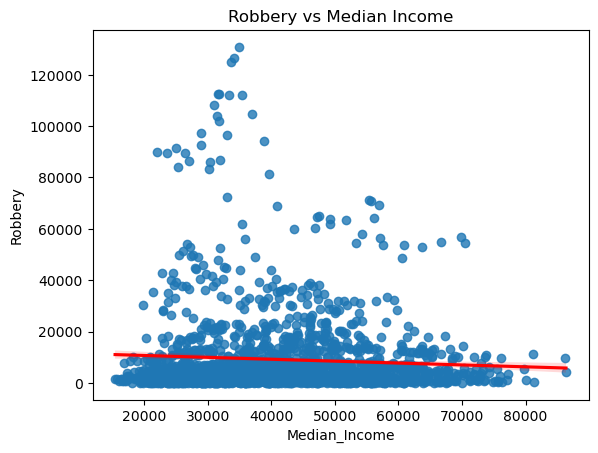

In [166]:
sns.regplot(x = income_robbery['Median_Income'], y = income_robbery['Robbery'], line_kws = {"color":"red"});
plt.title("Robbery vs Median Income");

Since the y value rises exponentionally comparatively to the x value. We want to take a log transform of the robbery (y value). Also, based on where the linear regression line is positioned, we can see that the y values have a lot of outliers that can be dealt with using a log transform on the y axis.

MAE for predicting robbery using income: 0.29952513809241593
RSME for predicting robbery using income: 0.3845879612089225


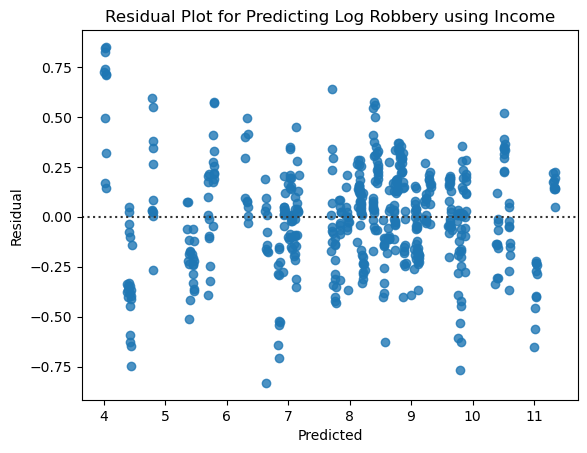

In [167]:
income_robbery['log_robbery'] = np.log(income_robbery['Robbery'])

#print(income_robbery.iloc[:, 47:])
#print((income_robbery.iloc[:, 1:-1]).columns)

X_inc_rob_train, X_inc_rob_test, y_inc_rob_train, y_inc_rob_test = \
                  train_test_split(income_robbery.iloc[:,1:-1],
                                   income_robbery['log_robbery'], test_size=0.3, shuffle=False)
X_inc_rob_train = sm.add_constant(X_inc_rob_train)
inc_rob_model =sm.OLS(y_inc_rob_train, X_inc_rob_train).fit()

X_inc_rob_test = sm.add_constant(X_inc_rob_test)
inc_rob_preds = inc_rob_model.predict(X_inc_rob_test)
print( f"MAE for predicting robbery using income: {mean_absolute_error(y_inc_rob_test, inc_rob_preds)}")
print( f"RSME for predicting robbery using income: {root_mean_squared_error(y_inc_rob_test, inc_rob_preds)}")


inc_rob_df = pd.DataFrame({"Preds": inc_rob_preds, "Actual": y_inc_rob_test})
ax = sns.residplot(x = inc_rob_preds, y = y_inc_rob_test)
ax.set(xlabel = "Predicted", ylabel= "Residual", \
       title = "Residual Plot for Predicting Log Robbery using Income");

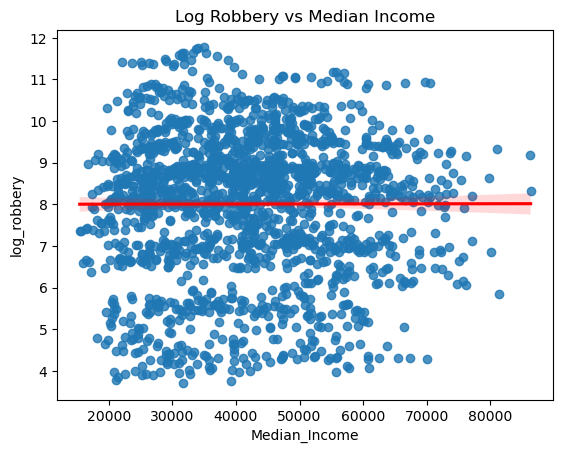

In [168]:
sns.regplot(x = income_robbery['Median_Income'], y = income_robbery['log_robbery'], \
            line_kws = {"color":"red"});
plt.title("Log Robbery vs Median Income");

In [169]:
print(inc_rob_model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_robbery   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1655.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:10:44   Log-Likelihood:                 180.57
No. Observations:                1260   AIC:                            -257.1
Df Residuals:                    1208   BIC:                             10.09
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.4351      6.542     -0.

Looking at this OLS regression, we observe that the p values for income and year are insignificant, 0.106 and 0.064 respectively (based on a 0.05 significance level). This shows that the insignificant coefficient for income is -4.422e-06. This shows that for every one dollar increase in income, e^(-4.422e-06) unit decrease of robberies. Although our hypothesis is not exactly testing income having a relationship with a states' number of robberies, the p-value still now tells us that it is not a strong determinor of robberies

For each of the states, using the test set, we get the predicted amount of robbery, along with the true value per year. 

In [170]:
# for each of the states, get the predicted value and the actual value
X_inc_rob_test2 = X_inc_rob_test
X_inc_rob_test2['actual_robbery'] = y_inc_rob_test
X_inc_rob_test2['preds_robbery'] = inc_rob_preds
inc_rob_melt = pd.melt(X_inc_rob_test2, id_vars=['const','Year', 'Median_Income', 'actual_robbery','preds_robbery'], \
                       var_name = 'State', value_name='Binary')
inc_rob_melt = inc_rob_melt[ inc_rob_melt['Binary']==1]
inc_rob_melt.head()

,const,Year,Median_Income,actual_robbery,preds_robbery,State,Binary
40,1.0,2010,57848.0,6.386879,6.347382,Alaska,1
90,1.0,2011,57431.0,6.356108,6.355366,Alaska,1
140,1.0,2012,63648.0,6.445720,6.334015,Alaska,1
190,1.0,2013,61137.0,6.434547,6.351259,Alaska,1
229,1.0,2013,72472.0,6.434547,6.301135,Alaska,1


We select 20 random states to see how well the model does on predicting the annual robbery totals. 

In [171]:
twenty_states = pd.DataFrame(np.random.choice(inc_rob_melt['State'], size =20, replace = False))
#print(twenty_states)
chosen_stats_robbery = duckdb.sql(''' SELECT * FROM inc_rob_melt
                                  WHERE Year>=2014 AND Year<=2018
                                  AND State IN (SELECT * FROM twenty_states)''').df()
chosen_stats_robbery.head()

,const,Year,Median_Income,actual_robbery,preds_robbery,State,Binary
0,1.0,2014,67629.0,6.444131,6.328692,Alaska,1
1,1.0,2015,75112.0,6.634633,6.301742,Alaska,1
2,1.0,2016,75723.0,6.745236,6.305180,Alaska,1
3,1.0,2017,72231.0,6.858565,6.326763,Alaska,1
4,1.0,2018,68734.0,6.797940,6.348367,Alaska,1


### Now we want to look at how the model did, visually, at predicting robbery for 20 random states. We chose to do 20 random ones so ensure there is no geographical bias or underlying pattern that the model is overfitting.

# Income and Robbery (Expected vs Predicted) for 2016

Here we create two dataframes: robbery_2016_actual which has the actual values for the annual amounts of robbery for our 20 chosen states, and robbery_2016_preds which has the predicted values from our model

In [172]:
robbery_2016= chosen_stats_robbery[chosen_stats_robbery['Year']==2016]
robbery_2016_actual = robbery_2016.drop(columns=['const','Binary','preds_robbery'])
robbery_2016_actual['Type'] = 'Actual'
robbery_2016_actual = robbery_2016_actual.rename(columns = {'actual_robbery':'robbery'})

robbery_2016_preds = robbery_2016.loc[:,['Year','Median_Income', 'preds_robbery','State']]
robbery_2016_preds = robbery_2016_preds.rename(columns = {'preds_robbery':'robbery'})
robbery_2016_preds['Type'] = 'Predicted'
print(robbery_2016_actual.head())
robbery_2016_preds.head()

    Year  Median_Income    robbery       State    Type
2   2016        75723.0   6.745236      Alaska  Actual
7   2016        45907.0   7.661527    Arkansas  Actual
12  2016        66637.0  10.911245  California  Actual
17  2016        70566.0   8.167636    Colorado  Actual
22  2016        61386.0   9.788582    Illinois  Actual


,Year,Median_Income,robbery,State,Type
2,2016,75723.0,6.305180,Alaska,Predicted
7,2016,45907.0,7.844725,Arkansas,Predicted
12,2016,66637.0,11.319757,California,Predicted
17,2016,70566.0,8.176907,Colorado,Predicted
22,2016,61386.0,10.397656,Illinois,Predicted


Merge the two data frames to get a single dataframe containing annual actual and predicted robbery rates.

In [173]:
robbery_2016_preds_actual = pd.concat([robbery_2016_actual , robbery_2016_preds], ignore_index=True, axis=0)
robbery_2016_preds_actual.head()

,Year,Median_Income,robbery,State,Type
0,2016,75723.0,6.745236,Alaska,Actual
1,2016,45907.0,7.661527,Arkansas,Actual
2,2016,66637.0,10.911245,California,Actual
3,2016,70566.0,8.167636,Colorado,Actual
4,2016,61386.0,9.788582,Illinois,Actual


[Text(0.5, 1.0, 'Income and Robbery for 20 Random States, Expected vs Predicted (2016)')]

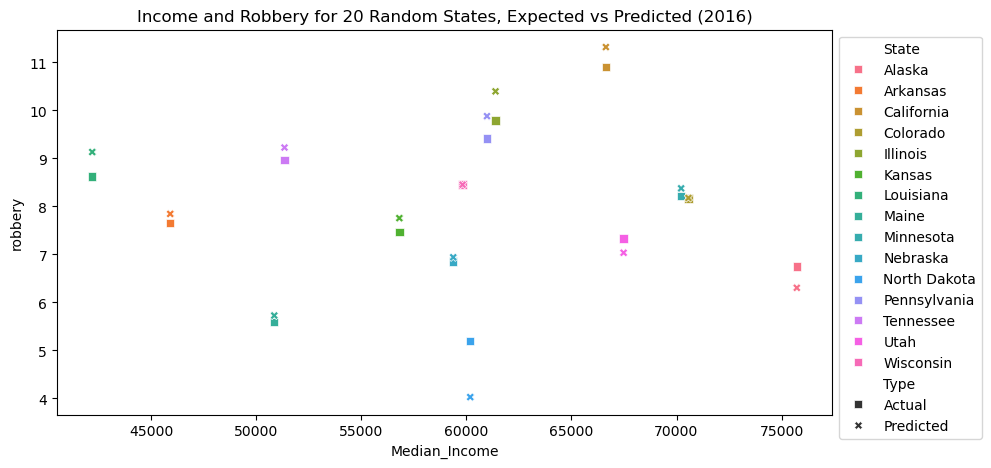

In [174]:
markers = {"Predicted":'X', 'Actual':'s'}
g = sns.scatterplot(data = robbery_2016_preds_actual, x='Median_Income',y='robbery',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Robbery for 20 Random States, Expected vs Predicted (2016)")

# Income and Robbery (Expected vs Predicted) for 2017

Here we create the dataframe robbery_2017_preds_actual which has the actual and predicted robbery rates for our 20 chosen states for the year 2017

In [175]:
robbery_2017= chosen_stats_robbery[chosen_stats_robbery['Year']==2017]
robbery_2017_actual = robbery_2017.drop(columns=['const','Binary','preds_robbery'])
robbery_2017_actual['Type'] = 'Actual'
robbery_2017_actual = robbery_2017_actual.rename(columns = {'actual_robbery':'robbery'})

robbery_2017_preds = robbery_2017.loc[:,['Year','Median_Income', 'preds_robbery','State']]
robbery_2017_preds = robbery_2017_preds.rename(columns = {'preds_robbery':'robbery'})
robbery_2017_preds['Type'] = 'Predicted'
robbery_2017_preds_actual = pd.concat([robbery_2017_actual , robbery_2017_preds], ignore_index=True, axis=0)

[Text(0.5, 1.0, 'Income and Robbery for 20 Random States, Expected vs Predicted (2017)')]

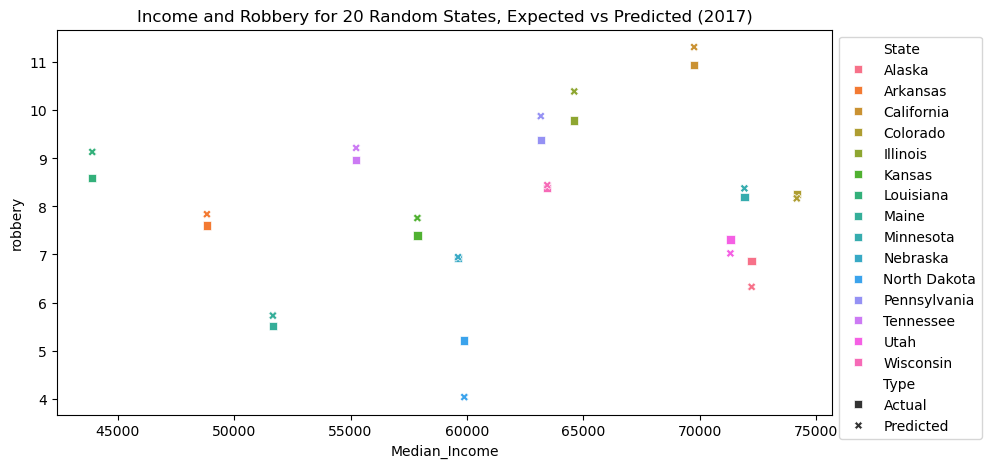

In [176]:
markers = {"Predicted":'X', 'Actual':'s'}
g = sns.scatterplot(data = robbery_2017_preds_actual, x='Median_Income',y='robbery',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Robbery for 20 Random States, Expected vs Predicted (2017)")

# Income and Robbery (Expected vs Predicted) for 2018

The dataframe robbery_2018_preds_actual which has the actual and predicted robbery rates for the chosen states in the year 2018

In [177]:
robbery_2018= chosen_stats_robbery[chosen_stats_robbery['Year']==2018]
robbery_2018_actual = robbery_2018.drop(columns=['const','Binary','preds_robbery'])
robbery_2018_actual['Type'] = 'Actual'
robbery_2018_actual = robbery_2018_actual.rename(columns = {'actual_robbery':'robbery'})

robbery_2018_preds = robbery_2018.loc[:,['Year','Median_Income', 'preds_robbery','State']]
robbery_2018_preds = robbery_2018_preds.rename(columns = {'preds_robbery':'robbery'})
robbery_2018_preds['Type'] = 'Predicted'
robbery_2018_preds_actual = pd.concat([robbery_2018_actual , robbery_2018_preds], ignore_index=True, axis=0)

[Text(0.5, 1.0, 'Income and Robbery for 20 Random States, Expected vs Predicted (2018)')]

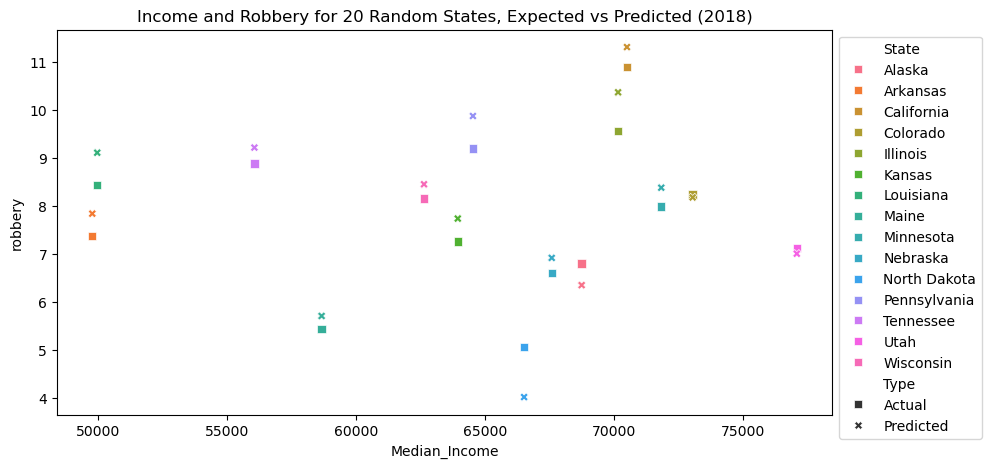

In [178]:
markers = {"Predicted":'X', 'Actual':'s'}
g = sns.scatterplot(data = robbery_2018_preds_actual, x='Median_Income',y='robbery',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Robbery for 20 Random States, Expected vs Predicted (2018)")

## Now, we train a different model for predicting burglary given income

In [179]:
income_burglary = duckdb.sql('''SELECT  Burglary,C.State, C.Year, Median_Income
                            FROM crime_df AS C JOIN income_melt AS I
                            ON C.State = I.State AND C.Year = I.Year
                            ORDER BY C.Year ASC''').df()
income_burglary = pd.get_dummies(income_burglary,prefix='', \
                                prefix_sep='', columns=['State'], dtype=int, drop_first=True)
income_burglary.head()

,Burglary,Year,Median_Income,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,6184,1984,32356.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39970,1984,17310.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20810,1984,15674.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52327,1984,21425.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,443094,1984,25287.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For this regression, we to utilize a log transform on the y (burglary) variable

MAE for predicting burglary using income: 0.18949502456210937
RSME for predicting burglary using income: 0.25217229608913777


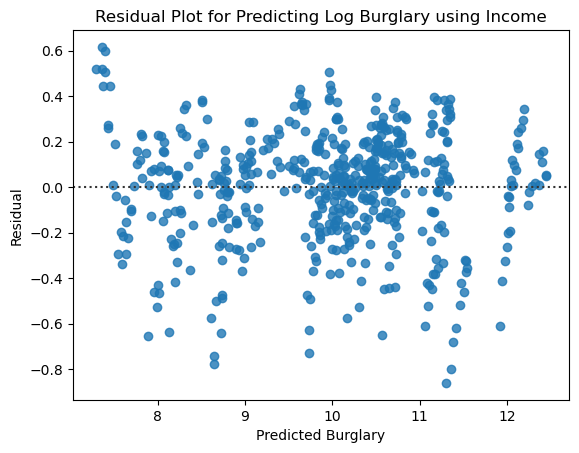

In [180]:
income_burglary['log_burglary'] = np.log(income_burglary['Burglary'])

X_inc_burg_train, X_inc_burg_test, y_inc_burg_train, y_inc_burg_test = \
                  train_test_split(income_burglary.iloc[:,1:-1],
                                   income_burglary['log_burglary'], test_size=0.3, shuffle=False)
X_inc_burg_train = sm.add_constant(X_inc_burg_train)
inc_burg_model =sm.OLS(y_inc_burg_train, X_inc_burg_train).fit()

X_inc_burg_test = sm.add_constant(X_inc_burg_test)
inc_burg_preds = inc_burg_model.predict(X_inc_burg_test)
print( f"MAE for predicting burglary using income: {mean_absolute_error(y_inc_burg_test, inc_burg_preds)}")
print( f"RSME for predicting burglary using income: {root_mean_squared_error(y_inc_burg_test, inc_burg_preds)}")

inc_burg_df = pd.DataFrame({"Preds": inc_burg_preds, "Actual": y_inc_burg_test})
ax = sns.residplot(x = inc_burg_preds, y = y_inc_burg_test)
ax.set(xlabel = "Predicted Burglary", ylabel= "Residual",\
        title = "Residual Plot for Predicting Log Burglary using Income");

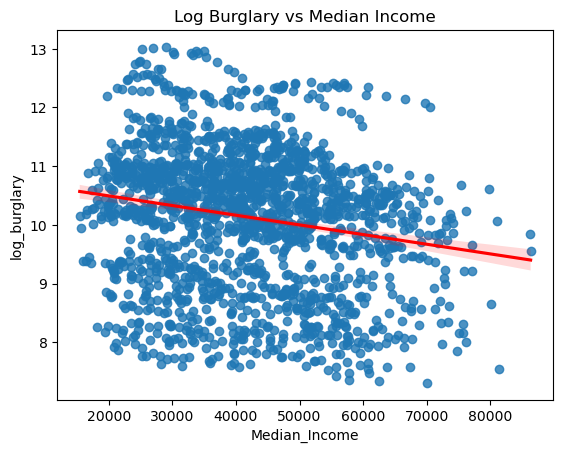

In [181]:
sns.regplot(x = income_burglary['Median_Income'],
            y = income_burglary['log_burglary'],
            line_kws = {"color":"red"})
plt.title("Log Burglary vs Median Income");

In [182]:
print(inc_burg_model.summary())

                            OLS Regression Results                            
Dep. Variable:           log_burglary   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1661.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:10:48   Log-Likelihood:                 684.01
No. Observations:                1260   AIC:                            -1264.
Df Residuals:                    1208   BIC:                            -996.8
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             21.8900      4.387      4.

Looking at this OLS regression, we observe that the p values for income and year are significant, 0.000 and 0.015, respectively (based on a 0.05 significance level). This shows that the significant coefficient for income is -1.028e-05. This shows that for every one dollar increase in income, e^(-1.028e-05) unit decrease of burglaries. Although our hypothesis is not exactly testing income having a relationship with a states' number of burglaries, the p-value still now tells us that it is a strong determinor of burglaries.

# Now, plot the predicted vs actual values of burglary when using income as a predictor

In [183]:
X_inc_burg_test2 = X_inc_burg_test
X_inc_burg_test2['actual_burglary'] = y_inc_burg_test
X_inc_burg_test2['preds_burglary'] = inc_burg_preds
inc_burg_melt = pd.melt(X_inc_burg_test2, \
                        id_vars=['const','Year', 'Median_Income', 'actual_burglary','preds_burglary'], \
                       var_name = 'State', value_name='Binary')
inc_burg_melt = inc_burg_melt[ inc_burg_melt['Binary']==1]
inc_burg_melt.head()

,const,Year,Median_Income,actual_burglary,preds_burglary,State,Binary
40,1.0,2010,57848.0,8.040769,8.225878,Alaska,1
90,1.0,2011,57431.0,7.955776,8.224721,Alaska,1
140,1.0,2012,63648.0,7.989560,8.155338,Alaska,1
190,1.0,2013,61137.0,7.978311,8.175717,Alaska,1
229,1.0,2013,72472.0,7.978311,8.059143,Alaska,1


We again choose 20 states at random to focus on in looking at the predicted and actual values of burglary rates

In [184]:
chosen_stats_burglary = duckdb.sql(''' SELECT * FROM inc_burg_melt
                                  WHERE Year>=2014 AND Year<=2018
                                   AND State IN (SELECT * FROM twenty_states)''').df()
chosen_stats_burglary.head()

,const,Year,Median_Income,actual_burglary,preds_burglary,State,Binary
0,1.0,2014,67629.0,8.055158,8.103505,Alaska,1
1,1.0,2015,75112.0,8.163656,8.021102,Alaska,1
2,1.0,2016,75723.0,8.307213,8.009373,Alaska,1
3,1.0,2017,72231.0,8.334952,8.039841,Alaska,1
4,1.0,2018,68734.0,8.290293,8.070361,Alaska,1


#### We follow a similar methodology from the previous model where we used income to predict burglary. Here, we will look at separate plots for years 2016, 2017, 2018 containing the predicted and actual values of burglary when using income in our regression

# Income and Burglary (Expected vs Predicted) for 2016

In [185]:
burglary_2016= chosen_stats_burglary[chosen_stats_burglary['Year']==2016]
burglary_2016_actual = burglary_2016.drop(columns=['const','Binary','preds_burglary'])
burglary_2016_actual['Type'] = 'Actual'
burglary_2016_actual = burglary_2016_actual.rename(columns = {'actual_burglary':'burglary'})

burglary_2016_preds = burglary_2016.loc[:,['Year','Median_Income', 'preds_burglary','State']]
burglary_2016_preds = burglary_2016_preds.rename(columns = {'preds_burglary':'burglary'})
burglary_2016_preds['Type'] = 'Predicted'
burglary_2016_preds_actual = pd.concat([burglary_2016_actual , burglary_2016_preds], ignore_index=True, axis=0)
#burglary_2016_preds_actual

[Text(0.5, 1.0, 'Income and Burglary for 20 Random States, Expected vs Predicted (2016)')]

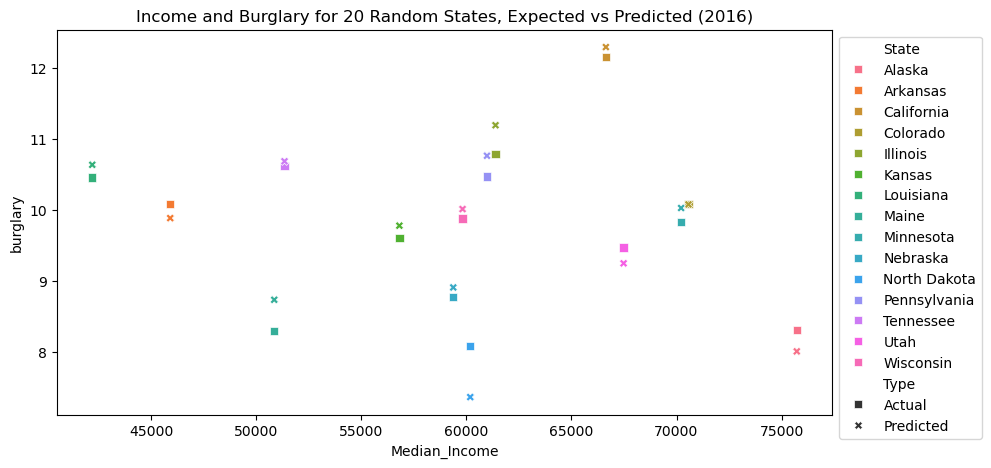

In [186]:
g = sns.scatterplot(data = burglary_2016_preds_actual, x='Median_Income',y='burglary',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Burglary for 20 Random States, Expected vs Predicted (2016)")

# Income and Burglary (Expected vs Predicted) for 2017

In [187]:
burglary_2017= chosen_stats_burglary[chosen_stats_burglary['Year']==2017]
burglary_2017_actual = burglary_2017.drop(columns=['const','Binary','preds_burglary'])
burglary_2017_actual['Type'] = 'Actual'
burglary_2017_actual = burglary_2017_actual.rename(columns = {'actual_burglary':'burglary'})

burglary_2017_preds = burglary_2017.loc[:,['Year','Median_Income', 'preds_burglary','State']]
burglary_2017_preds = burglary_2017_preds.rename(columns = {'preds_burglary':'burglary'})
burglary_2017_preds['Type'] = 'Predicted'
burglary_2017_preds_actual = pd.concat([burglary_2017_actual , burglary_2017_preds], ignore_index=True, axis=0)
#burglary_2017_preds_actual

[Text(0.5, 1.0, 'Income and Burglary for 20 Random States, Expected vs Predicted (2017)')]

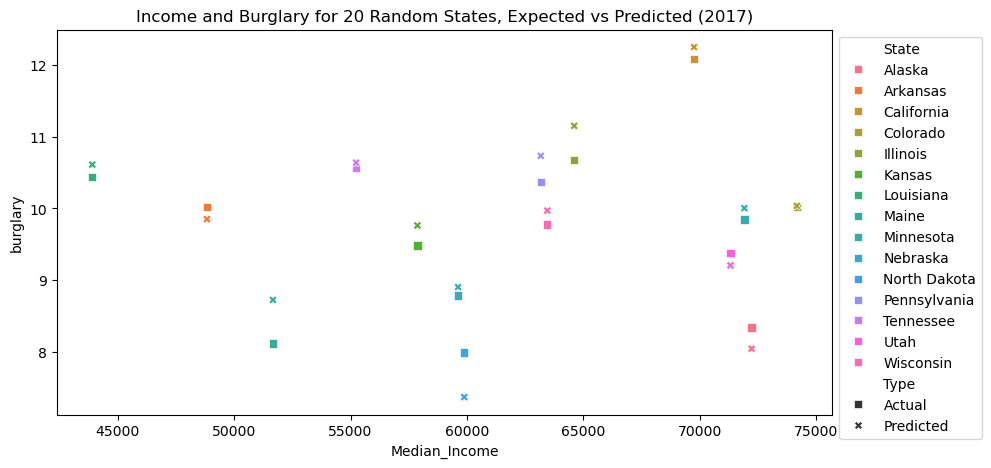

In [188]:
g = sns.scatterplot(data = burglary_2017_preds_actual, x='Median_Income',y='burglary',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Burglary for 20 Random States, Expected vs Predicted (2017)")

# Income and Burglary (Expected vs Predicted) for 2018

In [189]:
burglary_2018= chosen_stats_burglary[chosen_stats_burglary['Year']==2018]
burglary_2018_actual = burglary_2018.drop(columns=['const','Binary','preds_burglary'])
burglary_2018_actual['Type'] = 'Actual'
burglary_2018_actual = burglary_2018_actual.rename(columns = {'actual_burglary':'burglary'})

burglary_2018_preds = burglary_2018.loc[:,['Year','Median_Income', 'preds_burglary','State']]
burglary_2018_preds = burglary_2018_preds.rename(columns = {'preds_burglary':'burglary'})
burglary_2018_preds['Type'] = 'Predicted'
burglary_2018_preds_actual = pd.concat([burglary_2018_actual , burglary_2018_preds], ignore_index=True, axis=0)
#burglary_2018_preds_actual

[Text(0.5, 1.0, 'Income and Burglary for 20 Random States, Expected vs Predicted (2018)')]

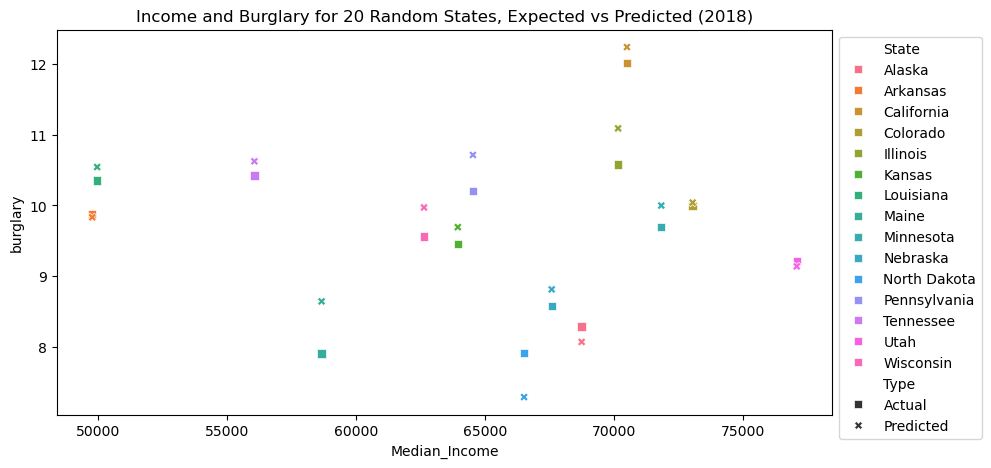

In [190]:
g = sns.scatterplot(data = burglary_2018_preds_actual, x='Median_Income',y='burglary',\
                hue='State', style = 'Type', markers = markers)
g.figure.set_size_inches(10,5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(title = "Income and Burglary for 20 Random States, Expected vs Predicted (2018)")

# Hypothesis 2

### There is a relationship among states that are above the U.S. unemployment average over the years 1980 to 2018 in predicting violent crime rates, and there is a relationship among states that are below the U.S. unemploymnent average over the years 1980 to 2018 in predicting violent crime rates.

In [191]:
#avg unemployment in the US
us_avg = job_df.iloc[0, 1:]
#print(us_avg)
us_average = us_avg.sum()/us_avg.size
print(us_average)

6.264102564102564


Looking across all the years from 1980 to 2018, the U.S. unemployment rate average is about 6.264.

In [192]:
#created a dictionary with all states and their respective unemployment averages across the years 1980 to 2018
dict_avg = {}
states = job_df.iloc[1:, 0].reset_index(drop=True) #rows 0,1,...50
#print(states)

#for x in range(1, 38):
for x in range(0,states.size):
    the_avg = job_df.iloc[x+1, 1:] #get the row for this state
    dict_avg[states[x]] = the_avg.sum()/(2018-1980) + 1

print(dict_avg)


{'Alabama': 8.339473684210525, 'Alaska': 8.976315789473684, 'Arizona': 7.371052631578947, 'Arkansas': 7.628947368421051, 'California': 8.39736842105263, 'Colorado': 6.46578947368421, 'Connecticut': 6.518421052631578, 'Delaware': 6.278947368421052, 'District of Columbia': 8.736842105263161, 'Florida': 7.197368421052631, 'Georgia': 7.1236842105263145, 'Hawaii': 5.7026315789473685, 'Idaho': 7.094736842105262, 'Illinois': 8.157894736842106, 'Indiana': 7.342105263157896, 'Iowa': 5.755263157894736, 'Kansas': 5.88157894736842, 'Kentucky': 8.06578947368421, 'Louisiana': 8.507894736842106, 'Maine': 6.776315789473684, 'Maryland': 6.360526315789474, 'Massachusetts': 6.457894736842107, 'Michigan': 9.092105263157896, 'Minnesota': 5.978947368421053, 'Mississippi': 8.807894736842107, 'Missouri': 7.123684210526315, 'Montana': 6.8921052631578945, 'Nebraska': 4.6421052631578945, 'Nevada': 7.75, 'New Hampshire': 5.3578947368421055, 'New Jersey': 7.221052631578949, 'New Mexico': 7.849999999999999, 'New Yo

Here we create a dataframe containing the average amount of violent crime, and the average unemployment rate for each state taken over all the years

In [193]:
states_unemp_avg_df = pd.DataFrame({'State':np.asarray(states), 'Avg_Unemployment':dict_avg.values()})
avg_violent_crime_states = duckdb.sql('''SELECT
                                      SUM(Violent_Crime)/Count(*) AS AvgViolentCrime,
                                      State
                                      FROM crime_df AS C
                                      GROUP BY State''').df()
states_unemp_avg_df = duckdb.sql(''' SELECT A.*, Avg_Unemployment
                                 FROM avg_violent_crime_states
                                 AS A JOIN states_unemp_avg_df AS S
                                  ON A.State  = S.State''').df()
states_unemp_avg_df.head()

,AvgViolentCrime,State,Avg_Unemployment
0,34618.534884,New Jersey,7.221053
1,36318.139535,Tennessee,7.586842
2,13584.651163,Wisconsin,6.692105
3,11867.534884,Kentucky,8.065789
4,123969.000000,New York,7.471053


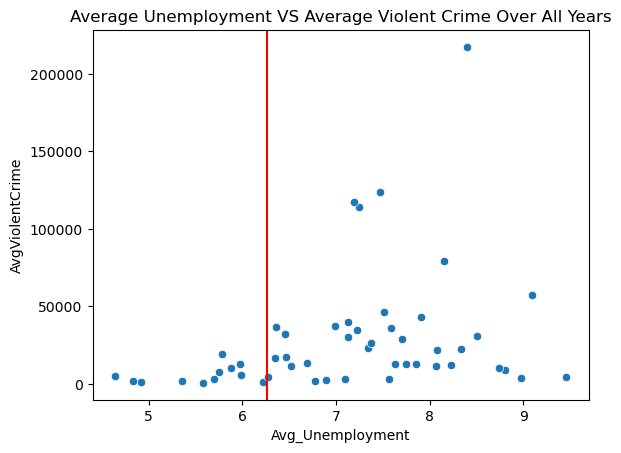

In [194]:
g= sns.scatterplot(data = states_unemp_avg_df, x ='Avg_Unemployment', y='AvgViolentCrime');
plt.axvline(x = us_average, color = "red");
plt.title('Average Unemployment VS Average Violent Crime Over All Years');

This scatterplot is a data visualization that demonstrates the national average unemployment rate as a vertical line. Then, it also represents the 50 states that are scattered across, showing that there are significantly more states that have unemployment rates greater than the national average, comparatively to the number of states below the national average.

Particularly, we plotted this average unemployment rate against the average violent crime (y axis). The general trend that this plot exemplifies is that a greater average unemployment rate corresponds to a greater average violent crime rate. We seek to investigate this through a comparison of two different models, one for states that are below the national unemployment rate average and one for states that are above the national unemployment rate average.

First, we create two lists: one with states having unemployment rates above the antional average, and another for those below.

In [195]:
# put all states that are lower than the national average in one list
# put all states that are above the national average in another list

less_dict = []
more_dict = []
count = 2
dict_avg[states[count]]

for x in dict_avg:
    rate = dict_avg[x]
    if rate < us_average:
        less_dict.append(x)
    else:
        more_dict.append(x)

print(less_dict)
print(more_dict)


['Hawaii', 'Iowa', 'Kansas', 'Minnesota', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Wyoming']
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Washington', 'West Virginia', 'Wisconsin']


In [196]:
#now get the info for states that have above average
states_above_df = job_melt[ job_melt['Area'].isin(more_dict)]
states_above_df.head()

,Area,Year,UnemploymentRate
1,Alabama,1980,8.9
2,Alaska,1980,9.6
3,Arizona,1980,6.6
4,Arkansas,1980,7.6
5,California,1980,6.8


In [197]:
states_above_df = duckdb.sql('''Select  C.Violent_Crime, S.*
                             FROM states_above_df AS S JOIN crime_df AS C
                             ON  S.Year = C.Year AND S.Area = C.State''').df()
states_above_df.head()

,Violent_Crime,Area,Year,UnemploymentRate
0,1919,Alaska,1980,9.6
1,17320,Alabama,1980,8.9
2,7656,Arkansas,1980,7.6
3,210290,California,1980,6.8
4,15215,Colorado,1980,5.8


In [198]:
states_above_df = pd.get_dummies(states_above_df, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['Area'])
states_above_df['Year'] = states_above_df['Year'].astype(int)
states_above_df.head()

,Violent_Crime,Year,UnemploymentRate,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,Tennessee,Texas,Washington,West Virginia,Wisconsin
0,1919,1980,9.6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17320,1980,8.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7656,1980,7.6,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,210290,1980,6.8,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15215,1980,5.8,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train the model to predict crime rate given unemployment rate using data for years 1980-2018 corresponding to states with an average unemployment rate above the national average

We apply a log transform on the y axis (violent crime rate), as well as on the x axis (unemployment rate).

MAE for predicting violent crime rate using states above national average:       0.21877660270961435
RSME for predicting violent crime rate using states above national average:       0.272094301110766


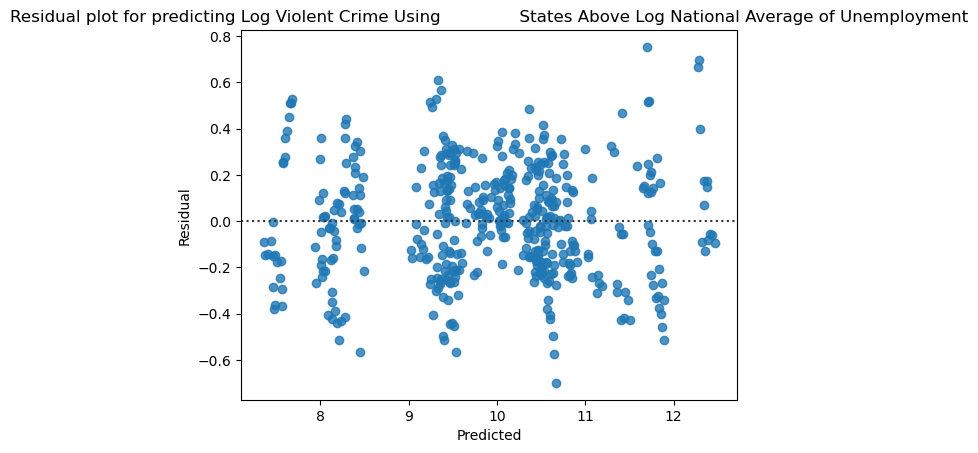

In [199]:
states_above_df['log_unemployment'] = np.log(states_above_df['UnemploymentRate'])
states_above_df['log_crime'] = np.log(states_above_df['Violent_Crime'])
modified_df = states_above_df.drop(columns = "UnemploymentRate")

#print(modifed_df.iloc[:, 1:-1].columns)
X_train_above, X_test_above, Y_train_above, Y_test_above = \
  train_test_split(modified_df.iloc[:, 1:-1],modified_df['log_crime'],\
                    test_size=.30, shuffle=False)
X_train_above = sm.add_constant(X_train_above)
model_above = sm.OLS( Y_train_above,X_train_above).fit()

X_test_above = sm.add_constant(X_test_above)
preds_above = model_above.predict(X_test_above)
y_above_df = pd.DataFrame(data = {"Preds":preds_above, "Actual":Y_test_above})

y_above_df.head()

ax = sns.residplot(data= y_above_df, x = 'Preds', y = 'Actual')
ax.set(xlabel = "Predicted", ylabel= "Residual",
       title="Residual plot for predicting Log Violent Crime Using \
              States Above Log National Average of Unemployment");

print( f"MAE for predicting violent crime rate using states above national average: \
      {mean_absolute_error(preds_above,Y_test_above)}")
print( f"RSME for predicting violent crime rate using states above national average: \
      {root_mean_squared_error(preds_above,Y_test_above)}")

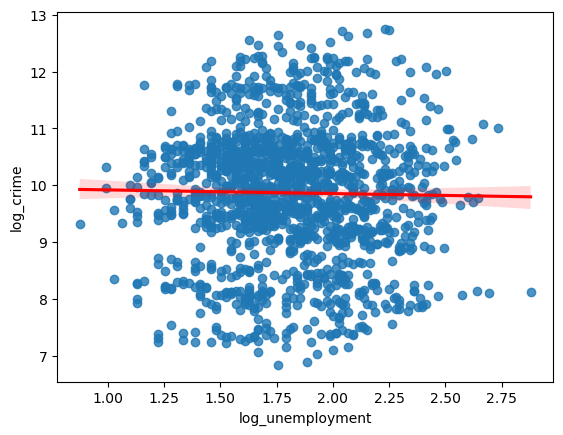

In [200]:
sns.regplot(x = states_above_df['log_unemployment'], y = states_above_df['log_crime'], line_kws = {"color":"red"});

In [201]:
print(model_above.summary())

                            OLS Regression Results                            
Dep. Variable:              log_crime   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     820.0
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:10:51   Log-Likelihood:                 180.36
No. Observations:                1064   AIC:                            -278.7
Df Residuals:                    1023   BIC:                            -74.95
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.3260 

In [202]:
print(model_above.params)

const                   5.325987
Year                    0.002511
Alaska                 -1.764312
Arizona                 0.093420
Arkansas               -0.632854
California              2.324917
Colorado               -0.346144
Connecticut            -0.606923
Delaware               -1.661968
District of Columbia   -0.684183
Florida                 1.729079
Georgia                 0.573794
Idaho                  -2.001730
Illinois                1.370516
Indiana                -0.029317
Kentucky               -0.581431
Louisiana               0.390955
Maine                  -2.609738
Maryland                0.517662
Massachusetts           0.420433
Michigan                1.040505
Mississippi            -0.859466
Missouri                0.296987
Montana                -2.486209
Nevada                 -0.712211
New Jersey              0.525756
New Mexico             -0.617922
New York                1.749060
North Carolina          0.493699
Ohio                    0.727094
Oklahoma  

Looking at this OLS regression, we observe that the p value for unemployment rate (what we are interested in) is significant (based on a 0.05 significance level). This shows that we can reject the null hypothesis (that there is no relationship between unemployment rate among states that are above the national average and violent crime rates). There exists a relationship, as exemplified by our p value that is less than the significance level.

Our model takes the form of 

$\ln (\text{crime}) = \beta_0\cdot \ln(\text{unemploymentRate}) + \beta_1 x_1 + \beta_2x_2 + ...$

$ \exp^{\ln(\text{crime})} =  \exp^{ \beta_0\cdot \ln(\text{unemploymentRate})} \cdot \exp^{\beta_1x_1} \cdot \exp^{\beta_2x_2}\cdot$ 

$\text{crime} = (\text{unemploymentRate})^{\beta_0} \cdot \exp^{\beta_1x_1} \cdot \exp^{\beta_2x_2}\cdot\cdot\cdot$

This means that when the unemployemnt rate changes by a factor of $c$, the amount of violent crime changes by a factor of $c^\beta_0$ where $\beta_0 = -0.178411$ is the coefficient from the model for ln(unemployment)

# Now we train a model to predict violent crime rate using the unemployment rates for states below the national average 

In [203]:
states_below_df = job_melt[ job_melt['Area'].isin(less_dict)]
states_below_df.head()

,Area,Year,UnemploymentRate
12,Hawaii,1980,5.0
16,Iowa,1980,6.0
17,Kansas,1980,4.4
24,Minnesota,1980,5.8
28,Nebraska,1980,3.9


In [204]:
states_below_df = duckdb.sql('''Select  C.Violent_Crime, S.*
                             FROM states_below_df AS S JOIN crime_df AS C
                             ON  S.Year = C.Year AND S.Area = C.State''').df()
states_below_df.head()

,Violent_Crime,Area,Year,UnemploymentRate
0,9168,Kansas,1980,4.4
1,352,North Dakota,1980,4.9
2,3512,Nebraska,1980,3.9
3,4425,Utah,1980,6.2
4,16355,Virginia,1980,5.2


In [205]:
states_below_df = pd.get_dummies(states_below_df, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['Area'])
states_below_df['Year'] = states_below_df['Year'].astype(int)
states_below_df.head()

,Violent_Crime,Year,UnemploymentRate,Iowa,Kansas,Minnesota,Nebraska,New Hampshire,North Dakota,South Dakota,Utah,Vermont,Virginia,Wyoming
0,9168,1980,4.4,0,1,0,0,0,0,0,0,0,0,0
1,352,1980,4.9,0,0,0,0,0,1,0,0,0,0,0
2,3512,1980,3.9,0,0,0,1,0,0,0,0,0,0,0
3,4425,1980,6.2,0,0,0,0,0,0,0,1,0,0,0
4,16355,1980,5.2,0,0,0,0,0,0,0,0,0,1,0


We apply a log transformation on the y axis (violent crime rates)

In [206]:
states_below_df['log_crime'] = np.log(states_below_df['Violent_Crime'])

X_train_below, X_test_below, Y_train_below, Y_test_below = \
  train_test_split(states_below_df.iloc[:,1:-1],
                   states_below_df['log_crime'], test_size=.30, shuffle=False)
#print(Y_test)
X_train_below = sm.add_constant(X_train_below)
model_below = sm.OLS( Y_train_below,X_train_below).fit()

X_test_below = sm.add_constant(X_test_below)
preds_below = model_below.predict(X_test_below)
y_below_df = pd.DataFrame(data = {"Preds":preds_below, "Actual":Y_test_below})
y_below_df.head()

print( f"MAE for predicting violent crime rate using states below national average: \
      {mean_absolute_error(preds_below,Y_test_below)}")
print( f"RSME for predicting violent crime rate using states below national average: \
      {root_mean_squared_error(preds_below,Y_test_below)}")

MAE for predicting violent crime rate using states below national average:       0.22514088308828198
RSME for predicting violent crime rate using states below national average:       0.2960296142006233


In [207]:
print(model_below.summary())

                            OLS Regression Results                            
Dep. Variable:              log_crime   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     781.0
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          1.10e-229
Time:                        22:10:51   Log-Likelihood:                 63.834
No. Observations:                 327   AIC:                            -99.67
Df Residuals:                     313   BIC:                            -46.61
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -18.2185      2.408  

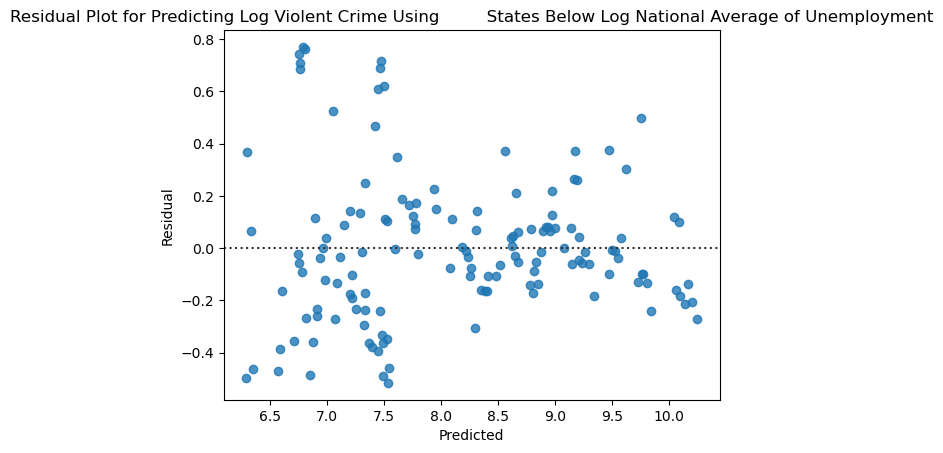

In [208]:
ax = sns.residplot(data= y_below_df, x = 'Preds', y = 'Actual')
ax.set(xlabel = "Predicted", ylabel= "Residual",
       title="Residual Plot for Predicting Log Violent Crime Using \
        States Below Log National Average of Unemployment");


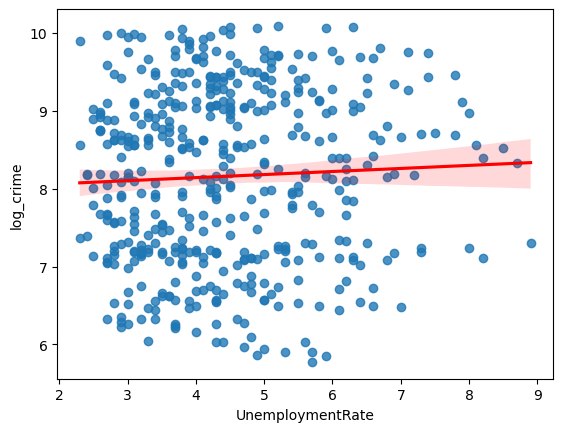

In [209]:
sns.regplot(x = states_below_df['UnemploymentRate'], \
            y = states_below_df['log_crime'], line_kws = {"color":"red"});

Looking at this OLS regression, we observe that the p value for unemployment rate is significant (based on a 0.05 significance level). Moreover, we observe that the p value for the year is insignificant since it is greater than the 0.05 signficance level. This shows that the significant coefficient for unemployment rate, which is -0.0450. This shows that for every one unit increase in the unemployment rate, that corresponds to a e^(-0.045) increase in the amount of violent crime rate. Due to the p value being lower than the signfiicance level, we can reject the null hypothesis (that there is no relationship between unemployment rates among states lower than the national average and violent crime rates). There is a relationship that exists.

# Hypothesis 3
### At least one of income, population, unemployment, and poverty (+ year) have a relationship with the 4 categories of violent crime for each state regardless of the year.



In [210]:
crime_job = duckdb.sql('''SELECT C.State, C.Year, UnemploymentRate,
                               C.Population,
                               FROM crime_df AS C
                               JOIN job_melt AS J ON
                               C.Year = J.Year AND J.Area = C.State
                               ''').df()
cj_poverty = duckdb.sql('''SELECT C.State, C.Year, C.Population,
                         UnemploymentRate, PovertyPercent
                               FROM crime_job AS C
                               JOIN poverty_concat AS P ON
                               C.Year = P.Year AND C.State = P.State
                               ''').df()
four_factors= duckdb.sql('''SELECT C.State, C.Year, C.Population,
                         UnemploymentRate, PovertyPercent,
                        Median_Income
                               FROM cj_poverty AS C
                               JOIN income_melt AS I ON
                               C.Year = I.Year AND C.State = I.State
                               ORDER BY C.Year ASC''').df()
four_factors.head() #2013 - 2018

,State,Year,Population,UnemploymentRate,PovertyPercent,Median_Income
0,Alabama,2013,4833996,7.2,16.7,47320.0
1,Alaska,2013,737259,7.0,10.9,72472.0
2,Arizona,2013,6634997,7.7,20.2,52611.0
3,Arkansas,2013,2958765,7.2,17.1,39376.0
4,California,2013,38431393,8.9,14.9,60794.0


## 3.1 Hypothesis
At least one of income, population, unemployment, and poverty (+ year) have a relationship with rape of each state regardless of the year.

### MODEL FOR RAPE

In [211]:
rape_fourfactors= duckdb.sql('''SELECT C.Rape, F.*
                               FROM crime_df AS C
                               JOIN four_factors AS F ON
                               C.Year = F.Year AND C.State = F.State
                               ORDER BY C.Year ASC''').df()
rape_fourfactors = pd.get_dummies(rape_fourfactors, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['State'])
#print(rape_fourfactors)
X4_train_rape, X4_test_rape, Y4_train_rape, Y4_test_rape = \
  train_test_split(rape_fourfactors.iloc[:,1:], rape_fourfactors['Rape'],\
                   test_size=.30, shuffle=False)
X4_train_rape = sm.add_constant(X4_train_rape)
model_rape = sm.OLS(Y4_train_rape,X4_train_rape).fit()
print(model_rape.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rape   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     372.1
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          3.06e-167
Time:                        22:10:52   Log-Likelihood:                -1693.3
No. Observations:                 245   AIC:                             3497.
Df Residuals:                     190   BIC:                             3689.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.335e+04    6.7e+04  

If we look exclusively at the four factors (+ year): Year, Population, Unemployment Rate, Poverty Percent, and Median Income, we can see that there is significant coefficient (based on a 0.05 signficance level) for population. Thus, we can reject the null hypothesis that none of the four factors (+ year) have a significant relationship with rape.

In [212]:
#make predictions using rape model
X4_test_rape = sm.add_constant(X4_test_rape)
rape4_preds = model_rape.predict(X4_test_rape)
print( f"MAE for predicting rape using the four factors: \
      {mean_absolute_error(Y4_test_rape, rape4_preds)}")
print( f"RSME for predicting rape using the four factors: \
      {root_mean_squared_error(Y4_test_rape, rape4_preds)}")

MAE for predicting rape using the four factors:       311.5111383524392
RSME for predicting rape using the four factors:       513.7375186153721


## 3.2 Hypothesis
At least one of income, population, unemployment, and poverty (+ year) have a relationship with homicide of each state regardless of the year.

### MODEL FOR HOMICIDE

In [213]:
homicide_fourfactors= duckdb.sql('''SELECT C.Homicide, F.*
                               FROM crime_df AS C
                               JOIN four_factors AS F ON
                               C.Year = F.Year AND C.State = F.State
                               ORDER BY C.Year ASC''').df()
homicide_fourfactors = pd.get_dummies(homicide_fourfactors, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['State'])
#print(homicide_fourfactors)

X4_train_homi, X4_test_homi, Y4_train_homi, Y4_test_homi = \
  train_test_split(homicide_fourfactors.iloc[:,1:], homicide_fourfactors['Homicide'],\
                   test_size=.30, shuffle=False)
X4_train_homi = sm.add_constant(X4_train_homi)
model_homicide = sm.OLS(Y4_train_homi,X4_train_homi).fit()
print(model_homicide.summary())

                            OLS Regression Results                            
Dep. Variable:               Homicide   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     402.7
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          1.84e-170
Time:                        22:10:52   Log-Likelihood:                -1201.4
No. Observations:                 245   AIC:                             2513.
Df Residuals:                     190   BIC:                             2705.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.392e+04   8998.286  

If we look exclusively at the four factors (+ year): Year, Population, Unemployment Rate, Poverty Percent, and Median Income, we can see that there are significant coefficients (based on a 0.05 signficance level) for year and population. Thus, we can reject the null hypothesis that none of the four factors (+ year) have a significant relationship with homicide.

In [214]:
#make predictions using homicide model
X4_test_homi = sm.add_constant(X4_test_homi)
homicide4_preds = model_homicide.predict(X4_test_homi)
print( f"MAE for predicting homicide using the four factors: \
      {mean_absolute_error( Y4_test_homi,homicide4_preds)}")
print( f"RSME for predicting homicide using the four factors: \
      {root_mean_squared_error(Y4_test_homi, homicide4_preds)}")

MAE for predicting homicide using the four factors:       56.87366280713931
RSME for predicting homicide using the four factors:       71.35952922187123


## 3.3 Hypothesis
At least one of income, population, unemployment, and poverty (+ year) have a relationship with aggravated assault of each state regardless of the year.

### MODEL FOR AGGRAVATED ASSAULT

In [215]:
assault_fourfactors= duckdb.sql('''SELECT C.Aggravated_Assault, F.*
                               FROM crime_df AS C
                               JOIN four_factors AS F ON
                               C.Year = F.Year AND C.State = F.State
                               ORDER BY C.Year ASC''').df()
assault_fourfactors = pd.get_dummies(assault_fourfactors, prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['State'])
#print(assault_fourfactors)

X4_train_assault, X4_test_assault, Y4_train_assault, Y4_test_assault = \
  train_test_split(assault_fourfactors.iloc[:,1:], assault_fourfactors['Aggravated_Assault'],\
                   test_size=.30, shuffle=False)
X4_train_assault = sm.add_constant(X4_train_assault)
model_assault = sm.OLS(Y4_train_assault,X4_train_assault).fit()
print(model_assault.summary())

                            OLS Regression Results                            
Dep. Variable:     Aggravated_Assault   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1345.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          6.70e-220
Time:                        22:10:52   Log-Likelihood:                -2022.1
No. Observations:                 245   AIC:                             4154.
Df Residuals:                     190   BIC:                             4347.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.722e+05   2.56e+05  

If we look exclusively at the four factors (+ year): Year, Population, Unemployment Rate, Poverty Percent, and Median Income, we can see that there is significant coefficient (based on a 0.05 signficance level) for population. Thus, we can reject the null hypothesis that none of the four factors (+ year) have a significant relationship with aggravated assault.

In [216]:
#make predictions using assault model
X4_test_assault = sm.add_constant(X4_test_assault)
assault4_preds = model_assault.predict(X4_test_assault)
print( f"MAE for predicting aggravated assault using the four factors: \
      {mean_absolute_error( Y4_test_assault,assault4_preds)}")
print( f"RSME for predicting aggravated assault using the four factors: \
      {root_mean_squared_error(Y4_test_assault,assault4_preds)}")

MAE for predicting aggravated assault using the four factors:       1381.4995644397807
RSME for predicting aggravated assault using the four factors:       2261.3542980047837


## 3.4 Hypothesis
At least one of income, population, unemployment, and poverty (+ year) have a relationship with robbery of each state regardless of the year.

### MODEL FOR ROBBERY

In [217]:
robbery_fourfactors= duckdb.sql('''SELECT C.Robbery, F.*
                               FROM crime_df AS C
                               JOIN four_factors AS F ON
                               C.Year = F.Year AND C.State = F.State
                               ORDER BY C.Year ASC''').df()
robbery_fourfactors = pd.get_dummies(robbery_fourfactors , prefix='', prefix_sep='',\
                                  drop_first=True, dtype=int, columns=['State'])
#print(robbery_fourfactors)

X4_train_robbery, X4_test_robbery, Y4_train_robbery, Y4_test_robbery = \
  train_test_split(robbery_fourfactors .iloc[:,1:], robbery_fourfactors ['Robbery'],\
                   test_size=.30, shuffle=False)
X4_train_robbery = sm.add_constant(X4_train_robbery)
model_robbery = sm.OLS(Y4_train_robbery,X4_train_robbery).fit()
print(model_robbery.summary())

                            OLS Regression Results                            
Dep. Variable:                Robbery   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     946.8
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          1.79e-205
Time:                        22:10:52   Log-Likelihood:                -1904.5
No. Observations:                 245   AIC:                             3919.
Df Residuals:                     190   BIC:                             4112.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.958e+05   1.59e+05  

If we look exclusively at the four factors (+ year): Year, Population, Unemployment Rate, Poverty Percent, and Median Income, we can see that there are significant coefficients (based on a 0.05 signficance level) for unemployment rate and population. Thus, we can reject the null hypothesis that none of the four factors (+ year) have a significant relationship with robbery.

In [218]:
#make predictions using robbery model
X4_test_robbery = sm.add_constant(X4_test_robbery)
robbery4_preds = model_robbery.predict(X4_test_robbery)
print( f"MAE for predicting robbery using the four factors: \
      {mean_absolute_error( Y4_test_robbery,robbery4_preds)}")
print( f"RSME for predicting robbery using the four factors: \
      {root_mean_squared_error(Y4_test_robbery,robbery4_preds)}")

MAE for predicting robbery using the four factors:       922.7968416893488
RSME for predicting robbery using the four factors:       1557.5517439986706


# Evaluation of Significance <a name="Evaluation"></a>
## Hypothesis 1: Income is a better predictor for robbery than burglary across the states.

Although the main method we used to comapare income being a predictor of robbery vs burglary is train test split and comparing relative MAE and RMSE values, we also ran OLS regression tests for both income ~ robbery and income ~ burglary to test some sub-hypotheses. We also included the different states and year in our OLS regression because we believe that its input into the model were important, though due to the numerous number of states, we only evaluated the significance of the variables we were interested in (income).

Essentially, we investigated sub-hypotheses within this hypothesis, based on the OLS regression. If the p value is less than the signficance level of 0.05, we can reject the null hyptohesis that there is no relationship between income and (either burlary or robbery). However, if the p value is greater than the significance level of 0.05, we fail to reject the null hypothesis.

Again, this does not directly answer our main hypothesis 1 — we aimed to answer this broader question not only by using OLS regressions/t tests and evaluation of significance but also by using train test split. 

In [219]:
# Income vs Robbery OLS regression
print(f"Coefficient: {inc_rob_model.params['Median_Income']}")
print(f"p-value: {inc_rob_model.pvalues['Median_Income']}")

Coefficient: -4.4220649094349295e-06
p-value: 0.1056196023555338


Since median income's p value of 0.719 is not less than the signficance level of 0.05, we fail to reject the null hypothesis that there is no relationship between the median income and robbery.

In [220]:
# Income vs Burglary
print(f"Coefficient: {inc_burg_model.params['Median_Income']}")
print(f"p-value: {inc_burg_model.pvalues['Median_Income']}")

Coefficient: -1.0284426843920932e-05
p-value: 2.4211526999809017e-08


Since median income's p value of 0.015 is less than the signficance level of 0.05, we can reject the null hypothesis that there is no relationship between the median income and burglary.

Therefore, all in all, as it relates to the main hypothesis 1, we can note that the OLS regression for median income vs. robbery yielded an insignificant coefficient for median income, while the OLS regression for median income vs. burglary yielded a significant coefficient for median income. Again, signficance tells us that there is a relationship between the two variables.

## Hypothesis 2: There is a relationship among states that are above the U.S. unemployment average over the years 1980 to 2018 in predicting violent crime rates, and there is a relationship among states that are below the U.S. unemploymnent average over the years 1980 to 2018 in predicting violent crime rates.

Similar to the previous hypothesis, we not only used t-tests and OLS regressions to test our hypothesis, but also used train test split. Moreover, 

In [221]:
# OLS regression for states above the average unemployment rate
print(f"Coefficient: {model_above.params['log_unemployment']}")
print(f"p-value: {model_above.pvalues['log_unemployment']}")

Coefficient: -0.17841104425957266
p-value: 1.337397300273809e-14


Instead of looking at the entire summary, I simply looked at the coefficient and p value for unemployment, since it appeared towards the end of the summary, so it didn't appear in the truncated summary.

Based on the small p value of 1.33e-14, which is less than the significance level of 0.05, we can reject the null hypothesis that there is no relationship between unemployment rates and violent crime rates (for states that are above the average unemployment rate).

In [222]:
print(f"Coefficient: {model_below.params['UnemploymentRate']}")
print(f"p-value: {model_below.pvalues['UnemploymentRate']}")

Coefficient: -0.04495800997152745
p-value: 1.62373260511353e-06



Based on the p value of 1.62e-06, which is less than the significance level of 0.05, we can reject the null hypothesis that there is no relationship between unemployment rates and violent crime rates (for states that are below the average unemployment rate).

## Hypothesis 3: At least one of income, population, unemployment, and poverty (+ year) have a relationship with the 4 categories of violent crime for each state regardless of the year.

This broader hypothesis had the most sub-hypotheses that we tested using t-tests to observe the significance of whether or not a relationship existed between a category and our 4 factors (+ year).

In [223]:
# Rape

print(f"p-value for Year: {model_rape.pvalues['Year']}")
print(f"p-value for Population: {model_rape.pvalues['Population']}")
print(f"p-value for Unemployment Rate: {model_rape.pvalues['UnemploymentRate']}")
print(f"p-value for Poverty: {model_rape.pvalues['PovertyPercent']}")
print(f"p-value for Income: {model_rape.pvalues['Median_Income']}")

p-value for Year: 0.44844052893252007
p-value for Population: 3.4218610490530756e-22
p-value for Unemployment Rate: 0.07680291203642022
p-value for Poverty: 0.4547912781839283
p-value for Income: 0.07590774900443466


Since the p-value for population is less than 0.05, we can reject the null hypothesis that there is no relationship between rape and one of income, population, unemployment, poverty, and year.

In [224]:
# Homicide

print(f"p-value for Year: {model_homicide.pvalues['Year']}")
print(f"p-value for Population: {model_homicide.pvalues['Population']}")
print(f"p-value for Unemployment Rate: {model_homicide.pvalues['UnemploymentRate']}")
print(f"p-value for Poverty: {model_homicide.pvalues['PovertyPercent']}")
print(f"p-value for Income: {model_homicide.pvalues['Median_Income']}")

p-value for Year: 0.009912848847460944
p-value for Population: 2.847509756470276e-11
p-value for Unemployment Rate: 0.5771784664955727
p-value for Poverty: 0.21809624514341858
p-value for Income: 0.48880910691965695


Since the p-values for population and year are less than 0.05, we can reject the null hypothesis that there is no relationship between homicide and one of income, population, unemployment, poverty, and year.

In [225]:
# Aggravated Assault

print(f"p-value for Year: {model_assault.pvalues['Year']}")
print(f"p-value for Population: {model_assault.pvalues['Population']}")
print(f"p-value for Unemployment Rate: {model_assault.pvalues['UnemploymentRate']}")
print(f"p-value for Poverty: {model_assault.pvalues['PovertyPercent']}")
print(f"p-value for Income: {model_assault.pvalues['Median_Income']}")

p-value for Year: 0.5293211718213582
p-value for Population: 4.710400576733012e-13
p-value for Unemployment Rate: 0.33130953358010895
p-value for Poverty: 0.814118317823932
p-value for Income: 0.3741392021884128


Since the p-value for population is less than 0.05, we can reject the null hypothesis that there is no relationship between aggravated assault and one of income, population, unemployment, poverty, and year.

In [226]:
# Robbery

print(f"p-value for Year: {model_robbery.pvalues['Year']}")
print(f"p-value for Population: {model_robbery.pvalues['Population']}")
print(f"p-value for Unemployment Rate: {model_robbery.pvalues['UnemploymentRate']}")
print(f"p-value for Poverty: {model_robbery.pvalues['PovertyPercent']}")
print(f"p-value for Income: {model_robbery.pvalues['Median_Income']}")

p-value for Year: 0.061568006176528314
p-value for Population: 0.5697681336755915
p-value for Unemployment Rate: 1.9243531015311026e-05
p-value for Poverty: 0.03754921210965942
p-value for Income: 0.6467755312700574


Since the p-values for unemployment rate and poverty are less than 0.05, we can reject the null hypothesis that there is no relationship between robbery and one of income, population, unemployment, poverty, and year.


# Conclusion <a name="#Conclusion"></a>


### Hypothesis 1: Income is a better predictor for robbery than burglary across the states.

After creating a regression model comparing income vs robbery and income vs burglary, we can see the differences in the RMSE and MAE metrics between the two models.

#### Income vs Robbery

- RSME for predicting robbery using income: 0.3845879612087546
- MAE for predicting robbery using income: 0.2995251380922235

#### Income vs Burglary

- RSME for predicting burglary using income: 0.25217229608909597
- MAE for predicting burglary using income: 0.1894950245621107

We observe that income vs burglary produces slightly better results across the board since it has a lower MAE and RMSE value, though the difference is quite small. Moreover, besides the train test split that created this model, we also ran a hypothesis test that overall aimed to demonstrate whether or not income vs robbery had a statistically signficant relationship (vs. not having a relationship) and whether or not income vs burglary had a statistically significant relationship (vs. not having a relationship). We found that there is only a statistically significant relationship between income and burglary, rejecting the null hypothesis that there is no relationship between those two variables.

As we noticed along the way, our hypothesis 1 is quite broad, which is why we also broke it down to hypotheis tests regarding whether or not there is a statistically significant relationship between income vs robbery or burglary. Moreover, we also went a step further by creating two models that utilized income as a predictor for robbery and burglary. In both the statistical significance test and the predictive regression model, we have found that income vs burglary has a more accurate model and income vs burglary has a statistically significant relationship (while income vs robbery doesn't).


### Hypothesis 2: There is a relationship among states that are above the U.S. unemployment average over the years 1980 to 2018 in predicting violent crime rates, and there is a relationship among states that are below the U.S. unemploymnent average over the years 1980 to 2018 in predicting violent crime rates.

In conclusion, when looking at the average unemployment rate over the years vs average violent crime rates over the years, we got a significant coefficient, showing a positive relationship between the two. This allowed us to reject the null hypothesis (that there was no relationship between average unemployment rate over the years vs average violent crime rates over the years), as we observed a significant p value. From there, to actually test our specific hypothesis, we looked at two groups: states that have an unemployment rate that is lower than the national average and states that have an unemployment rate that is greater than the national average. With this information, we created two models that can predict the violent crime rates based on the category of unemployment rate the states fall into (either below or above the national average).

After log transformations, we observed the following about our predictive models:
#### States Below National Average:
- RMSE: 0.29602961420061813
- MAE: 0.22514088308826197

#### States Above National Average:

- RSME: 0.27352759131431054
- MAE: 0.21924054627991002

With the relatively low and similar RMSE and MAE values across the states that are above and below the national average, we can conclude that both of our models are quite accurate at predicting violent crime rates.

Moreover, with OLS regression models for both of the two groups, we also performed signficance testing showing that for states that are below the national average, the coefficient for unemployment rate vs violent crime rates was significant, and for states that are above the national average, the coefficient for unemployment rate vs violent crime rates was also signficant. So, for both of these groups, we should reject the null hypothesis (that there is no relationship between unemployment rate and violent crime rates). There is a relationship for both models (above and below the national average) between unemployment rate and violent crime rates.

The broader implication is that unemployment rate over the years is a good predictor of average violent crime rates, regardless of whether or not a state is above or below the average unemployment rate across the United States.

### Hypothesis 3: At least one of income, population, unemployment, and poverty (+ year) have a relationship with the 4 categories of violent crime for each state regardless of the year.

This was by far our most broad hypothesis, which is why we broke it down into many sub-hypotheses accoridng to the 4 categories of violent crime for each state: rape, homicide, aggravated assault, and robbery. Each of these sub hypotheses were essentially testing whether or not there is a statistically significant relationship between at least one of the following factors we have been exploring throughout our project (income, population, unemployment, poverty, year) and the category of violent crime.

In conclusion, we found that when creating an OLS regression including all of these factors and the category of interest, each sub-hypothesis showed at least one of the factors had a statistically significant coefficient. This shows that, when all these factors are included in the regression, at least one of them will have a statistically signficiant coefficient with each of the different categories of violent crime.

Here is a breakdown of what was factor was statistically significant for each:

Rape:
- Population

Homicide:
- Population
- Year

Aggravated Assault:
- Population

Robbery:
- Unemployment Rate
- Poverty

The broader implication of this is that these findings highlight that there is a complex relationship between socioeconomic and demographic factors and different categories of violent crime. With this data, the federal or state agencies can enact change and create stratgies about crime prevention. More sepcifically, the significance of population across multiple categories suggests that densely populated areas may require more interventions, patrol, and community resources. Moreover, economic factors like unemployment rate and poverty suggest the importance of addressing economic disparities through support programs and emphasis on job creation and growth. Lastly, the significance of year suggests the importance of time in creating change, especially with societal trends and policies that can influence violent crime rates.

# Limitations <a name = "Limitation"></a>

### Data set related
- Our data is not encompassing of all the kinds of counties/regions within a state. For our factors (income, poverty, unemployment and population), they are measured state by state, there is no consideration for the urban, suburban or rural areas, so a crime rate that is measured of 5% may not be applicable to all regions of the state. This contributes to the residual we have that are +/- a couple thousand (refer to hypothesis #1). 

- Our analysis has different time periods. We tried to find datasets as close to the 1979 to 2018 time range as possible, but data sets like income only starts at 1984-2018 while unemployment starts at 1980-2018. We would wanted to have looked at the most recent year, 2023. The crime data frame had that range, but the factors we were analyzing did not. We would have had even more data to train, especially given that our data is generalized for across each state.

- The original income data set had a margin of error for each state’s income each year. We removed it to create consistency across our data by just taking the average income. However, the +/- could have been useful in seeing how it would predict vioelnt crime rates if we were more conservative in our research

- There is collinarity amongst the coefficients, but is quite common social economic regressions as many social and economic variables tend to be interconnected and correlated with each other, making it likely for multiple independent variables in a model to show significant relationships with each other (Professor Koenecke)

### Analysis related
- Did not use Regression Discontinuity Design (RDD), which could provide a stronger framework for causal inference. If we knew how to properly implement RDD, we could use it to look at factors like national average unemployment rate as a threshold to compare violent crime rates in states just above and below this cutoff. By focusing on observations near the threshold, we could isolate the causal impact of unemployment on violent crime, offering more insights into the relationships between unemployment (ando ther factors of similar analysis) versus violent crime rates

- Did not create heatmaps, where we would have plotted the different predictions of violent crime for a given factor like income vs burglary and income vs robbery (hypothesis #1). We would have shown the actual versus predicted versions of the maps as a visual in observing any geographic patterns, like if better predictions were made on the west versus east coast. We did not know how to plot data respective to a state and for only the U.S. and not the entire world

- There are definitely more than 4 factors that affect crimes, so including more related beyond personal socio-economic status would be beneficial. For example, political changes over the years as we mentioned in the overarching question the dynamics that politics play into crime and the enforcement of it. 

- We could have looked at other crimes outside of the violent crime scope to better understand the relationship crimes have with the four factors we chose, such as exploring property crimes like larceny or motor vehicle theft. Including a broader range of crime types would provide a more comprehensive view of how socioeconomic factors impact crime as a whole, rather than limiting our understanding to violent crime alone

- The most accurate dataset available for crime was from the FBI government website, but it did not include the pandemic years, so we did not have the most up to date data that we could compare with recent current events. 

- As suggested in our feedback for Phase 3 by our TAs, if we knew how to run random forests or gradient boosting, we could have improved predictive accuracy by capturing non-linear relationships and interactions between factors

# Citations <a name="Citation"></a>

Forming our hypotheses were based on some online research about the topic of violent crimes (and its subcategories) and the factors that do and do not affect them

Source regarding the minimal effect of disparity of income on crime
- Jawadi, Fredj, et al. “Does higher unemployment lead to greater criminality? revisiting the debate over the business
      cycle.” Journal of Economic Behavior &amp; Organization, vol. 182, Feb. 2021, pp. 448–471, https://doi.org/10.1016/j.jebo.2019.03.025.

Source discussing possible effect of unemployment on violent and non-violent crimes
- Pazzona, Matteo. “Revisiting the income inequality-crime puzzle.” World Development, vol. 176, Apr. 2024, p. 106520,
       https://doi.org/10.1016/j.worlddev.2023.106520. 
  
Source discussing the effects of factors such as income, unemployment, etc. on the amount of violent crime
-  Wilkins, Natalie J., et al. “Societal determinants of violent death: The extent to which social, economic, and structural
   characteristics explain differences in violence across Australia, Canada, and the United States.” SSM - Population Health, vol. 8, Aug. 2019, p. 100431, https://doi.org/10.1016/j.ssmph.2019.100431. 

General research:
- Brenan, Megan. “Economy Most Important Issue to 2024 Presidential Vote.” Gallup.Com, Gallup, 15 Nov. 2024, [news.gallup.com/poll/651719/economy-important-issue-2024-presidential-vote.aspx. ](https://news.gallup.com/poll/651719/economy-important-issue-2024-presidential-vote.aspx)

- Jones, Jeffrey M. “More Americans See U.S. Crime Problem as Serious.” Gallup.Com, Gallup, 16 Oct. 2024, [news.gallup.com/poll/544442/americans-crime-problem-serious.aspx.](https://news.gallup.com/poll/544442/americans-crime-problem-serious.aspx) 

- Westcott, Diane N, and Robert W Bednarzik. Employment and Unemployment: A Report on 1980, Monthly Labor Review , Feb. 1981, [www.bls.gov/opub/mlr/1981/02/art1full.pdf. ](https://www.bls.gov/opub/mlr/1981/02/art1full.pdf)

#### Unemployment dataset
- “Annual Unemployment Rates by State.” Annual Unemployment Rates by State | Iowa Community Indicators Program, Iowa State University, Apr. 2019, [www.icip.iastate.edu/tables/employment/unemployment-states. ](https://www.icip.iastate.edu/tables/employment/unemployment-states)
- Raw data link: 
      https://github.com/w0ahnder/INFO2950_project/blob/97d2b8a7d6583dd30dd254fc0b3b3449b99d1338/phase4/data/emp_table.csv 

### Crime dataset
- FBI Crime Data Explorer, cde.ucr.cjis.gov/LATEST/webapp/#/pages/downloads. Accessed 9 Dec. 2024. 
- Raw data link: https://github.com/w0ahnder/INFO2950_project/blob/97d2b8a7d6583dd30dd254fc0b3b3449b99d1338/data/crime.csv

### Income dataset
- United States Census Bureau,  https://www2.census.gov/programs-surveys/cps/tables/time-series/historical-income-households/h08.xls

- Raw data link:
 https://github.com/w0ahnder/INFO2950_project/blob/97d2b8a7d6583dd30dd254fc0b3b3449b99d1338/phase4/data/income.csv

### Poverty dataset
- U.S. Census Bureau, "Historical Poverty Tables: People and Families - 1959 to 2023" Table 18  https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-poverty-people.html
- Raw data link: 
https://github.com/w0ahnder/INFO2950_project/blob/main/phase4_datacleaning/data/poverty.csv


